<h1> Scikit Learn - Iris Data

<h2> Preview data

In [1]:
from IPython.display import IFrame

IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

<h2> Load data

In [5]:
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()  # Returns class

<h2> Inspect data </h2>
- Features and response should be <b>separate objects</b>
- Features and reponse should be <b>numeric</b>
- Features and response should be <b>numpy arrays</b>
- Features and response should have <b>specific shapes</b>

In [7]:
type(iris)

sklearn.datasets.base.Bunch

In [28]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [27]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [30]:
iris.data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [24]:
type(iris.data)

numpy.ndarray

In [31]:
iris.data.shape  # 150 observations of 4 features

(150, 4)

In [25]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [23]:
type(iris.target)

numpy.ndarray

In [32]:
iris.target.shape  # 150 observations of 1 target

(150,)

<h2> Store data

In [33]:
X = iris.data

In [34]:
Y = iris.target

<h2> KNN </h2>
- Fix $k$, the number of neighbors to reference
- Then $k$ neighbors closest within feature space vote on class

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=1)  # Instantiate the estimator

<h3> Show hyperparameters

In [42]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [44]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

<h3> Train model

In [45]:
X = iris.data

In [47]:
X[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [46]:
y = iris.target

In [48]:
y[:5]

array([0, 0, 0, 0, 0])

In [49]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

<h3> Make prediction

In [50]:
knn.predict([[3, 5, 4, 2]])  # Expects matrix where each row is observation

array([2])

In [51]:
knn.predict([[3, 5, 4, 2], [5, 4, 3, 2]])  # 2 rows so 2 predictions

array([2, 1])

<h3> New $k$

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)

In [53]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [54]:
knn.predict([[3, 5, 4, 2], [5, 4, 3, 2]])  # Prediction 1 has changed!

array([1, 1])

<h2> Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

<b> Instantiate

In [56]:
logreg = LogisticRegression()

<b> Train

In [57]:
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<b> Classify

In [58]:
logreg.predict([[3, 5, 4, 2], [5, 4, 3, 2]])

array([2, 0])

<h1> Model selection </h1>
- KNN(n=1), KNN(n=5), or Logistic Regression?

<h2> Method 1: Train / test on entire dataset

<b> Iris data

In [84]:
from sklearn.datasets import load_iris

iris = load_iris()  # iris is a class

X = iris.data
y = iris.target

<b> Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()  # logreg class

logreg.fit(X, y)  # Train (on entire dataset)

yhat_logreg = logreg.predict(X)  # Predict (for entire dataset)
yhat_logreg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [96]:
from sklearn import metrics

metrics.accuracy_score(y, yhat_logreg)  # Training accuracy

0.95999999999999996

<b> KNN ($k$=5)

In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn5 = KNeighborsClassifier(n_neighbors=5)

knn5.fit(X, y)  # Train (on entire dataset)

yhat_knn5 = knn5.predict(X)  # Predict (for entire dataset)
yhat_knn5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [101]:
from sklearn import metrics

metrics.accuracy_score(y, yhat_knn5)  # Training accuracy

0.96666666666666667

<b> KNN ($k$=1)

In [104]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=1)

knn1.fit(X, y)  # Train (on entire dataset)

yhat_knn1 = knn1.predict(X)  # Predict (for entire dataset)
yhat_knn1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [105]:
from sklearn import metrics

metrics.accuracy_score(y, yhat_knn1)  # Training accuracy

1.0

<h2> Method 2: Train / test split </h2>
- Split into training and test
- Train on training
- Test on testing

In [121]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [122]:
X_train.shape

(90, 4)

In [123]:
X_test.shape

(60, 4)

In [124]:
y_train.shape

(90,)

In [125]:
y_test.shape

(60,)

<b> Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()              # Instantiate model, class 'LogisticRegression'
logreg.fit(X_train, y_train)               # Train model
yhat_lgrg = logreg.predict(X_test)         # Predict classes for test data features
metrics.accuracy_score(y_test, yhat_lgrg)  # Test accuracy

0.94999999999999996

<b> KNN $k$=5

In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn5 = KNeighborsClassifier(n_neighbors=5)  # Instantiate model, class 'KNeighborsClassifier'
knn5.fit(X_train, y_train)                  # Train model
yhat_knn5 = knn5.predict(X_test)            # Predict classes for test data features
metrics.accuracy_score(y_test, yhat_knn5)   # Test accuracy

0.96666666666666667

<b> KNN $k$=1

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn1 = KNeighborsClassifier(n_neighbors=1)  # Instantiate model, class 'KNeighborsClassifier'
knn1.fit(X_train, y_train)                  # Train model
yhat_knn1 = knn1.predict(X_test)            # Predict classes for test data features
metrics.accuracy_score(y_test, yhat_knn1)   # Test accuracy

0.94999999999999996

<h3> KNN wins, but can we find a better $k$?

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1, 26)  # k's to try
scores = []             # Store their test accuracies

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    yhat = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, yhat))

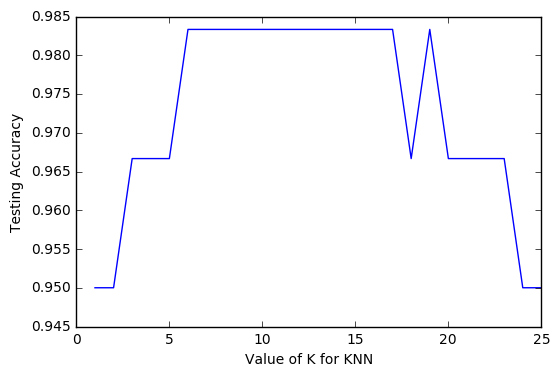

In [138]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.plot(k_range, scores)  # x_values, y_values
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

<h2> Let's try $k = 11$

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
yhat = knn.predict(X_test)
metrics.accuracy_score(y_test, yhat)

0.98333333333333328

In [144]:
knn.predict([[3, 5, 4, 2]])

array([1])

<h2> Problems with train / test split </h2>
- <b>High variance estimate</b> of out-of-sample accuracy
- <b>K-fold cross-validation</b> overcomes that limitation

<h1> Linear Regression / Pandas with Scikit

In [5]:
import pandas as pd

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

- Thousands of dollars spent on (TV, Radio, Newspaper)
- Thousands of items sold (Sales)
- Each observation is a market

In [6]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


<h2> Seaborn visualization

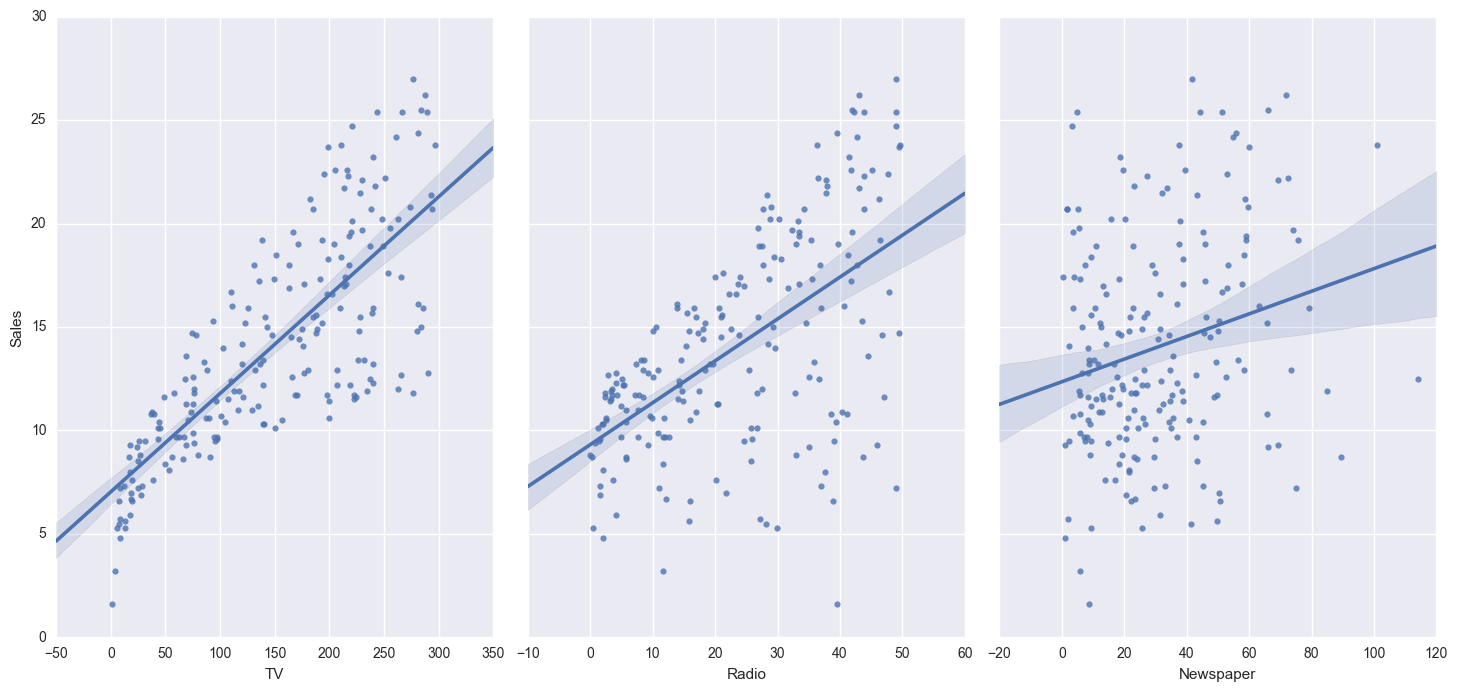

In [8]:
import seaborn as sns
%matplotlib inline

sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

<h1> Linear regression </h1>
- Pros: Fast, no tuning, interpretable, understood
- Cons: Underfits (suboptimal test accuracy)

In [9]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<b> Bad

In [10]:
data['TV'].head()  # Ugly

1    230.1
2     44.5
3     17.2
4    151.5
5    180.8
Name: TV, dtype: float64

<b> Good

In [11]:
data[['TV']].head()  # Pretty

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8


In [12]:
data[['TV', 'Radio']].head()

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8


In [13]:
data[['TV', 'Radio', 'Newspaper']].head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [14]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data[['Sales']]

In [19]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)  # Default is 75 / 25

In [20]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
linreg.intercept_, linreg.coef_

(array([ 2.87696662]), array([[ 0.04656457,  0.17915812,  0.00345046]]))

In [178]:
feature_cols = ['TV', 'Radio', 'Newspaper']
list(zip(feature_cols, linreg.coef_[0]))

[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.0034504647111803779)]

In [25]:
yhat = linreg.predict(X_test)
yhat[:5]

array([[ 21.70910292],
       [ 16.41055243],
       [  7.60955058],
       [ 17.80769552],
       [ 18.6146359 ]])

In [30]:
from sklearn import metrics

metrics.mean_absolute_error(y_test, yhat)

1.0668917082595206

In [31]:
metrics.mean_squared_error(y_test, yhat)

1.9730456202283368

In [34]:
import numpy as np

RMSE = np.sqrt(metrics.mean_squared_error(y_test, yhat))
RMSE

1.404651423032895

<h2> Remove 'Newspaper' and check RMSE

In [35]:
feature_cols = ['TV', 'Radio']  # Mask for columns

X = data[feature_cols]  # Apply mask
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)  # Train model

yhat = linreg.predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test, yhat))  # RMSE went down

1.3879034699382886